In [23]:
from PIL import Image
import numpy as np
#p表示奇异值的百分比
def rebuild_img(u, sigma, v, p):
    #print (p)
    m = len(u)
    n = len(v)
    a = np.zeros((m, n)) 
 
    count = (int)(sum(sigma))
    curSum = 0
    k = 0
    #取前p%的特征值
    while curSum <= count * p:
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a +=np.dot(uk, vk)*sigma[k]
        curSum += sigma[k]
        k += 1
 
    #print ('k:',k)
    a[a < 0] = 0
    a[a > 255] = 255
     #按照最近距离取整数，并设置参数类型为uint8
    return np.rint(a).astype("uint8")
if __name__ == '__main__':
    img = Image.open(u'picture1.jpg', 'r')
    a = np.array(img)
    for p in [0.01,0.02,0.1,0.5]:
        #svd分解
        u, sigma, v = np.linalg.svd(a[:, :, 0])
        sigma1=sigma
        R = rebuild_img(u, sigma, v, p)
        u, sigma, v = np.linalg.svd(a[:, :, 1])
        sigma2=sigma
        G = rebuild_img(u, sigma, v, p)
        u, sigma, v = np.linalg.svd(a[:, :, 2])
        sigma3=sigma
        B = rebuild_img(u, sigma, v, p)
        I = np.stack((R, G, B), 2)
        #保存图片在img文件夹下
        Image.fromarray(I).save("svd_" + str(int(p * 100)) + ".jpg")

66637.30389691958
18776.0269314795
11861.667013545797
9080.825613168983
7185.951002982149
6525.582640909466
5498.920954392763
4805.2638002371095
4469.606953223378
4327.467595865542
3879.942343211499
3580.6603998577916
3324.1903678016743
3183.8020859178055
3062.9265907775193
2969.3369861345473
2694.4651188863454
2590.4639458522756
2510.0924900977725
2394.3901316307083
2205.8197531099127
2142.698281229724
2038.1194150957515
1994.47346942038
1942.0252436961603
1862.623869515812
1830.9039807507904
1747.7018901057138
1685.7984999746127
1666.170357420599
1638.3367457037143
1618.4105347682432
1566.7822639060162
1551.2247524159834
1528.088003013684
1493.7090524292635
1477.2810656821096
1453.0049896725084
1445.5321869319362
1389.6137224074537
1368.8307143330974
1352.4411186488035
1323.3937656978103
1307.7883630913716
1295.90443287033
1261.7603387407369
1254.9547572678537
1225.8601077208612
1215.268601260599
1204.0843836439597
1186.6924037201359
1173.9861421351889
1158.2804442811914
1149.0215237

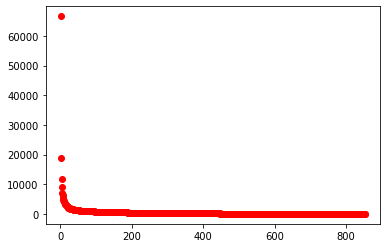

73500.92119630377
16249.841096846145
11865.625922954265
8118.665112473863
7379.463045642601
6785.783657421364
6351.89791615054
5560.588850333789
5099.33126723424
4791.616280861139
4641.7963748871425
4417.454618496643
4031.6915303293626
3914.1726185999964
3613.5562206216678
3493.6823388125517
3294.08334957791
3224.6708065281296
2995.1633461522856
2791.6485097946334
2651.177078634859
2606.148556135681
2492.8803598773297
2434.779797999326
2385.573984742166
2353.2448838021187
2272.8912997982857
2235.4952020613373
2161.95577236276
2143.79516440646
2131.3535008441813
2057.83953740652
1986.9751409585456
1938.6907527457454
1851.8438637196411
1809.1526739481137
1784.2513577818252
1759.8362743015116
1744.1246946648148
1680.6656389260945
1666.6247538030502
1600.4855782557122
1593.0201226489644
1524.2836389219503
1523.3807684397825
1499.8792996535772
1457.966347436217
1454.2840999634775
1442.295244291416
1428.1864396323533
1399.7705284104195
1373.0911846830093
1350.2527847082579
1330.0315320008733

6.875094168355417
6.810243354392335
6.674698324133721
6.632396954708745
6.498426861359805
6.434181561360166
6.36271322521296
6.2418444181560115
6.069468998393047
6.025954963552321
5.991010084419099
5.883011547594687
5.875939998635107
5.6956015414393395
5.640293139295994
5.567771811752358
5.495096584995138
5.33126515750631
5.324901893158903
5.202768087755052
5.121052329937396
5.093401704511414
5.004783869337555
4.9593225708254005
4.767976536252541
4.7356993233068465
4.68234110354234
4.5694872752526345
4.474522202590531
4.403795911139249
4.287482490057019
4.184011130035593
4.1752982961810305
4.088564482786365
4.010981545719804
3.905339205308238
3.8181629801042467
3.746127829413949
3.668882633282657
3.569183313869126
3.4420626493789026
3.3486565035483813
3.243313957231991
3.1949264183537607
3.0889552342625173
2.963078735343155
2.959040340666909
2.8698772352910704
2.820825918746451
2.7215768569237646
2.6535166281464213
2.450447777152036
2.3705944013509046
2.147071332812037
1.73591234948570

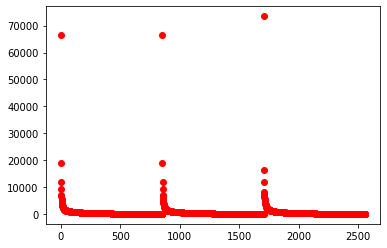

80133.49040559943
13693.033297373691
11882.488352368197
8799.236932793365
7803.003931850153
6789.412123559156
6192.008249388982
5992.6873103387625
5475.3973367725785
5162.374271635849
5045.5365182317555
4467.522878608479
4343.645998703783
4224.434644411998
3872.6536176662808
3455.298766907747
3390.6228317494806
3284.4193404223033
3160.605667758009
2884.056925607712
2725.9120970281565
2637.6494981430296
2594.423596926436
2521.708855337882
2493.3968417685
2408.3950149642556
2373.205729052051
2276.5397602323314
2236.53559033972
2165.08879810069
2103.987375653895
2038.2621190347245
1989.647291755445
1921.837465081289
1864.9791532486247
1823.0483400416013
1817.3759910511994
1766.3522518873888
1747.5505302758584
1710.253850072161
1656.30078866018
1635.1695990957462
1624.195378295362
1552.6426278143117
1526.276872576163
1505.7591149895404
1478.9337530926698
1463.3050825368825
1439.4564359590354
1417.1562095750267
1414.575098937121
1376.1520683147896
1339.9525079615382
1332.3703798934146
1305.

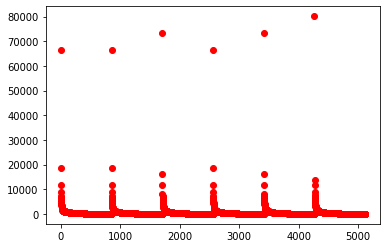

In [22]:
#特征曲线作图
import numpy as np
from PIL import Image
import pylab as pl
import math
import codecs
yss=[]
ays=list()
axs=list()
i=0
max1=pow(2,16)-1
for y in sigma1:
    
    yss.append(y)
    print(y)
for index in range(len(yss)):

    y1=yss[index]

    i+=1;
    y=int(y1)

    ays.append(y)
    axs.append(i)
pl.plot(axs, ays,"ro")# use pylab to plot x and y
pl.show()# show the plot on the screen
for y in sigma2:
    
    yss.append(y)
    print(y)
for index in range(len(yss)):

    y1=yss[index]

    i+=1;
    y=int(y1)

    ays.append(y)
    axs.append(i)
pl.plot(axs, ays,"ro")# use pylab to plot x and y
pl.show()# show the plot on the screen
for y in sigma3:
    
    yss.append(y)
    print(y)
for index in range(len(yss)):

    y1=yss[index]

    i+=1;
    y=int(y1)

    ays.append(y)
    axs.append(i)
pl.plot(axs, ays,"ro")# use pylab to plot x and y
pl.show()# show the plot on the screen